# Testing with old data

In [1]:
import pandas as pd

In [8]:
df = pd.read_pickle(
    "/Users/jlq293/Projects/Study-1-Bibliometrics/data/03-interim/specter-embeddings/df_with_specter2_embeddings.pkl"
)
df.shape

(35153, 29)

In [6]:
df.columns

Index(['authors', 'title', 'year', 'cited_by', 'doi', 'link', 'abstract',
       'author_keywords', 'index_keywords', 'references', 'pubmed_id',
       'document_type', 'source', 'eid', 'journal', 'first_author', 'nameyear',
       'unique_nameyear', 'title_abstract', 'paper_id', 'oc_refs', 'oc_dois',
       'cr_refs', 'cr_dois', 'merged_dois', 'oc_nr_dois', 'cr_nr_dois',
       'merged_nr_dois', 'specter2_embeddings'],
      dtype='object')

# KNN

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array(df["specter2_embeddings"].tolist())

# Number of neighbors
k = 10

# Initialize and fit the model
# metric='cosine' will use cosine similarity
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(X)

# Find k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)


In [18]:
# max similarity score
len(distances)
# turn off scientific notation
np.set_printoptions(suppress=True)
distances

array([[0.        , 0.04248786, 0.05208212, ..., 0.05725467, 0.06045407,
        0.06075859],
       [0.00000006, 0.0923996 , 0.09254497, ..., 0.09979272, 0.09983027,
        0.0998652 ],
       [0.00000018, 0.06835675, 0.06915379, ..., 0.07794213, 0.07838231,
        0.07896042],
       ...,
       [0.0000003 , 0.04048586, 0.0540055 , ..., 0.06445777, 0.06479794,
        0.06515932],
       [0.        , 0.030954  , 0.03975713, ..., 0.04864299, 0.04924732,
        0.05060935],
       [0.        , 0.04249674, 0.04303199, ..., 0.0618006 , 0.06327552,
        0.06334496]], dtype=float32)

In [13]:
similarities

array([[1.        , 0.95751214, 0.9479179 , ..., 0.9427453 , 0.9395459 ,
        0.9392414 ],
       [0.99999994, 0.9076004 , 0.907455  , ..., 0.9002073 , 0.90016973,
        0.9001348 ],
       [0.9999998 , 0.93164325, 0.9308462 , ..., 0.92205787, 0.9216177 ,
        0.9210396 ],
       ...,
       [0.9999997 , 0.95951414, 0.9459945 , ..., 0.9355422 , 0.93520206,
        0.9348407 ],
       [1.        , 0.969046  , 0.96024287, ..., 0.951357  , 0.9507527 ,
        0.94939065],
       [1.        , 0.95750326, 0.956968  , ..., 0.9381994 , 0.9367245 ,
        0.93665504]], dtype=float32)

In [ ]:
# loop over each pair in similarty matrix and calcutee the edge weight by retrieving the cite score, multiply by alpha, and add to the 

In [20]:
for i in range(5, 21, 5):
    print(i)

5
10
15


/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

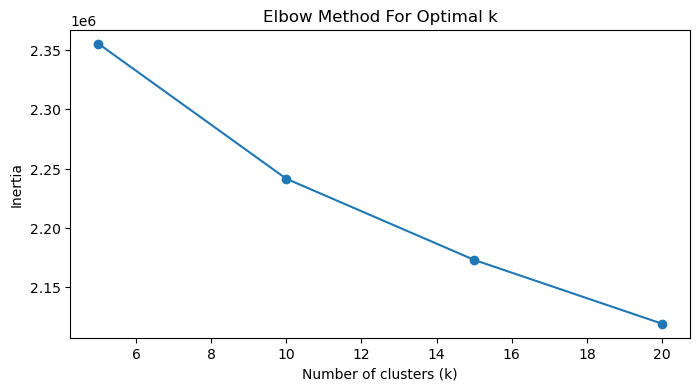

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a features matrix X

# Range of k to try
k_values = range(5, 21, 5)
inertia = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, m)
    model.fit(X)
    inertia.append(model.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()